# COVID19 Cell Atlas 

Single cell sequencing data from patients with covid19 - includes relevant immune cells and would seem a good realistic source of single cell reference. There are far fewer structural cell types present than in the Lung Atlas - is this reflective of BAL fluid, or of COVID19? How comparable are immune responses in COVID19 and VAP?

Links: [Data](https://www.covid19cellatlas.org/#wilk20) and the pre-print [paper](https://www.medrxiv.org/content/10.1101/2020.11.20.20227355v1).

## Imports and Settings

In [1]:
# Import libs
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# display settings
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
pd.options.display.max_seq_items = 2000

In [3]:
# Import anndata objects
bal_sc = ad.read("../project-data/BALF_VIB-UGent_processed_cleaned.h5ad")


## Assessing the data

In [4]:
bal_sc

AnnData object with n_obs × n_vars = 275056 × 24740
    obs: 'orig.ident', 'Age', 'Sex', 'Race', 'Ethnicity', 'BMI', 'Pre-existing heart disease', 'Pre-existing lung disease', 'Pre-existing kidney disease', 'Pre-existing diabetes', 'Pre-existing hypertension', 'Pre-existing immunocompromised condition', 'Smoking', 'SARS-CoV-2 PCR', 'SARS-CoV-2 Ab', 'Symptomatic', 'Admitted to hospital', 'Highest level of respiratory support', 'Vasoactive agents required during hospitalization', '28-day death', '28-day outcome', 'Disease classification', 'Organ System', 'Source', 'Days since hospital admission', 'SOFA', 'Technology', 'Method', 'CITE-Seq panel', 'Reference', 'Institute', 'Creation date', 'Annotation'
    var: 'feature_type', 'gene_id'
    obsm: 'X_umap'

In [5]:
# Cell types are stored in 'Annotation'
cells = bal_sc.obs['Annotation'].value_counts()
cells

Neutrophil             143066
Macrophage              43084
Macrophage:Alveolar     24444
CD4+ T-cell             22055
CD8+ T-cell             11723
Plasma cell              8871
gd T-cell                8583
Doublet                  3679
NK                       3057
Epithelial cell          2354
pDC                      1700
cDC                      1666
B cell                    426
Baso Mast                 348
Name: Annotation, dtype: int64

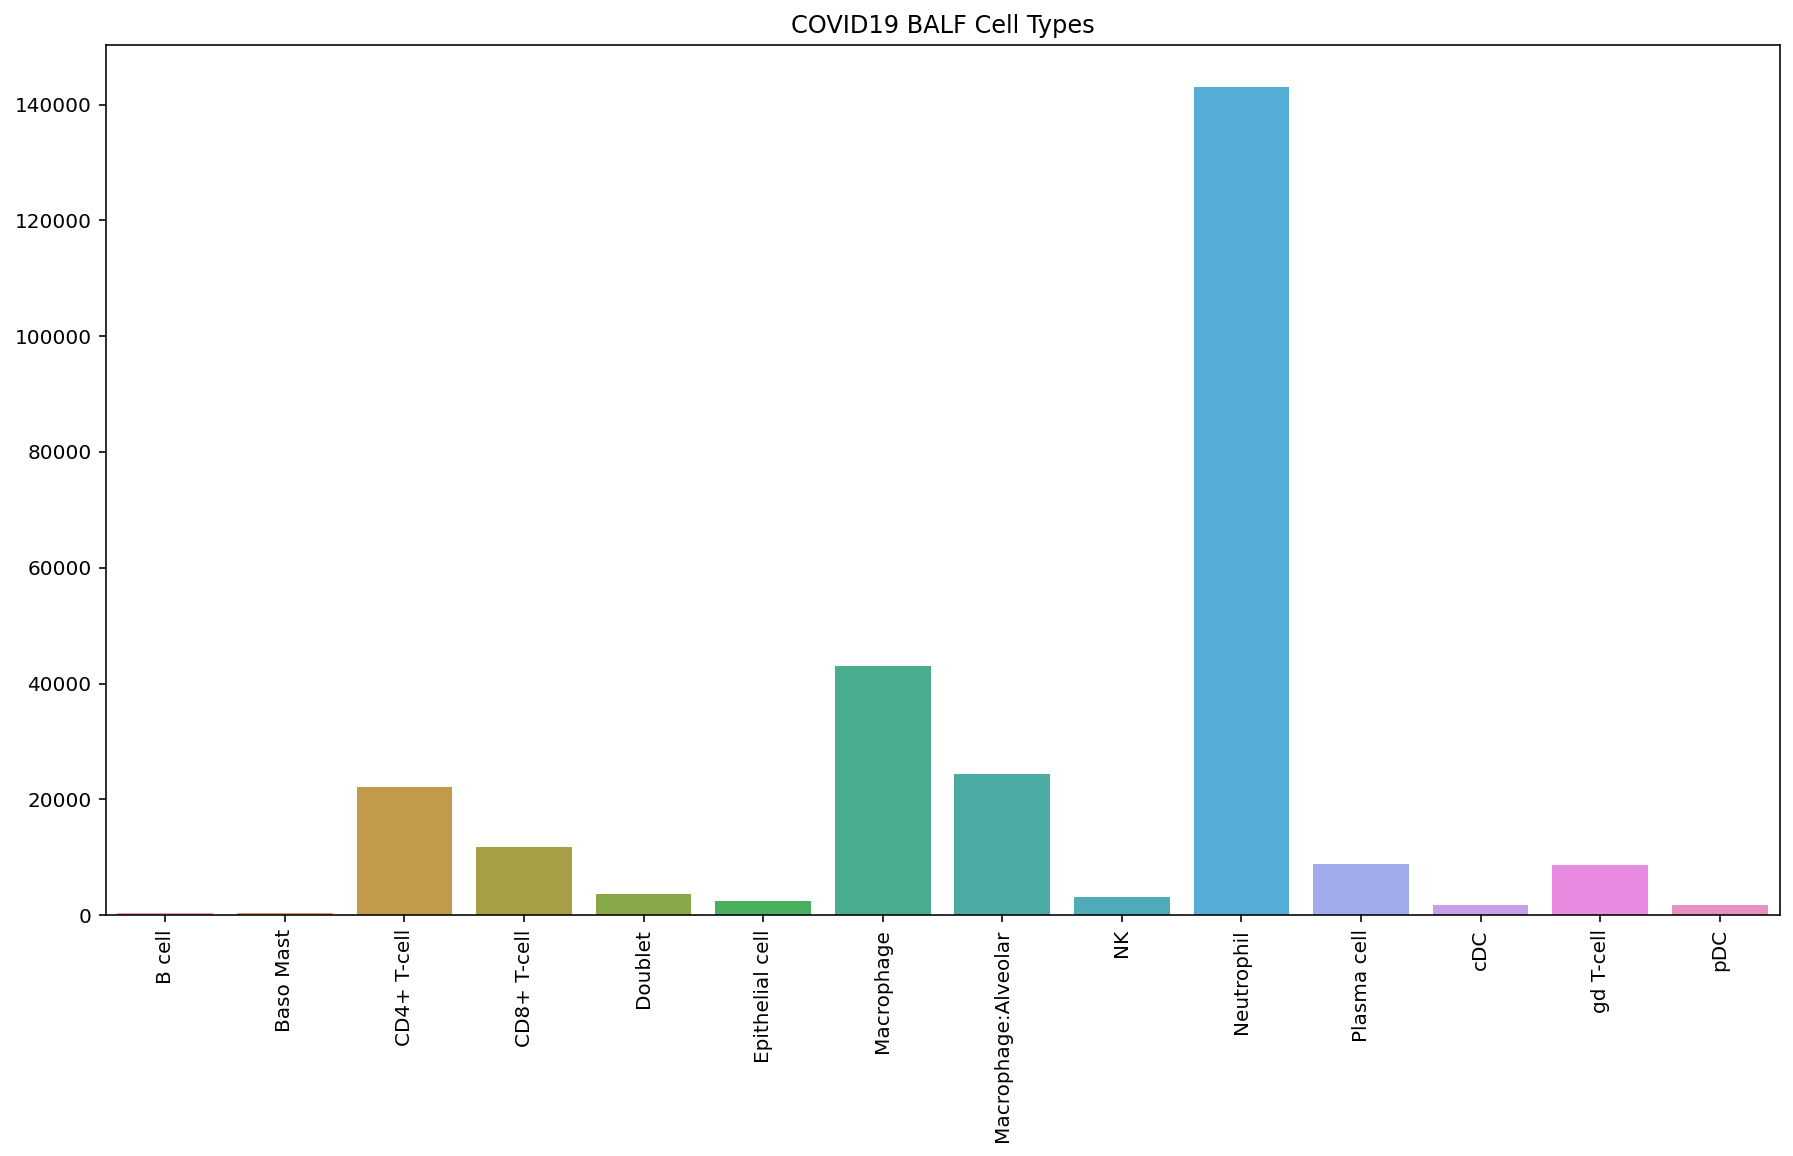

In [6]:
# Plot frequency of cell types present
plt.figure(figsize=(15,8))
ax = sns.barplot(x=cells.index, y=cells.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title('COVID19 BALF Cell Types')
plt.show()
